In [4]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import load_mpl_presets, named_colors, mpl_loc, fancy_legend
import numpy as np
import sys
sys.path.append("..")
from src.mzr import am2013
load_mpl_presets()
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


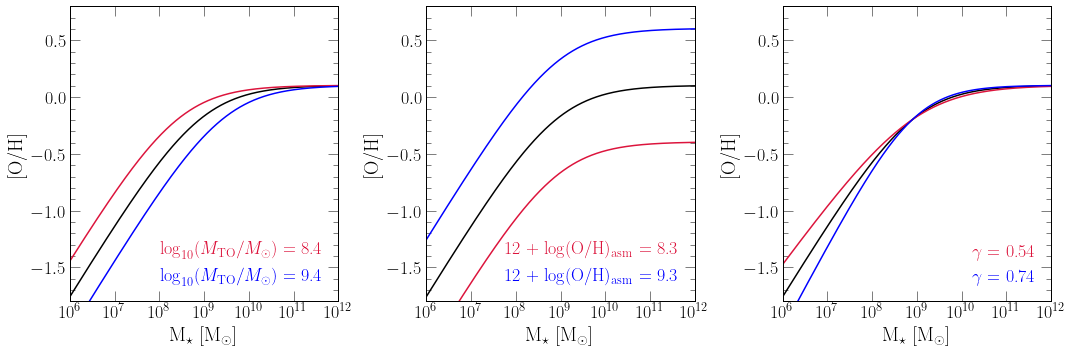

In [10]:
fig = plt.figure(figsize = (15, 5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel(r"M$_\star$ [M$_\odot$]")
    axes[i].set_ylabel("[O/H]")
    axes[i].set_xscale("log")
    axes[i].set_xlim([1.e6, 1.e12])
    axes[i].set_xticks([10**_ for _ in range(6, 13)])
    axes[i].set_ylim([-1.8, 0.8])

xvals = np.logspace(6, 12, 1000)
yvals = [am2013(_) for _ in xvals]
for i in range(3): axes[i].plot(xvals, yvals, c = named_colors()["black"])
    
logmto = [8.4, 9.4]
colors = ["crimson", "blue"]
default_logmto = am2013.logmto
for i in range(len(logmto)):
    am2013.logmto = logmto[i]
    yvals = [am2013(_) for _ in xvals]
    axes[0].plot(xvals, yvals, c = named_colors()[colors[i]],
        label = r"$\log_{10}(M_\text{TO}/M_\odot)$ = %g" % (logmto[i]))
am2013.logmto = default_logmto
legend_kwargs = {
    "loc": mpl_loc("lower right"),
    "ncol": 1,
    "handlelength": 0
}
leg = axes[0].legend(**legend_kwargs)
fancy_legend(leg, colors)

logplus12oh_asm = [8.3, 9.3]
default_logplus12oh_asm = am2013.logplus12oh_asm
for i in range(len(logplus12oh_asm)):
    am2013.logplus12oh_asm = logplus12oh_asm[i]
    yvals = [am2013(_) for _ in xvals]
    axes[1].plot(xvals, yvals, c = named_colors()[colors[i]],
        label = r"12 + $\log$(O/H)$_\text{asm}$ = %g" % (logplus12oh_asm[i]))
am2013.logplus12oh_asm = default_logplus12oh_asm
leg = axes[1].legend(**legend_kwargs)
fancy_legend(leg, colors)

gamma = [0.54, 0.74]
default_gamma = am2013.gamma
for i in range(len(gamma)):
    am2013.gamma = gamma[i]
    yvals = [am2013(_) for _ in xvals]
    axes[2].plot(xvals, yvals, c = named_colors()[colors[i]],
        label = r"$\gamma$ = %.2f" % (gamma[i]))
am2013.gamma = default_gamma
leg = axes[2].legend(**legend_kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

# ax = fig.add_subplot(111)
# ax.set_xscale("log")
# ax.set_xlabel(r"$M_\star$ [M$_\odot$]")
# ax.set_ylabel("[O/H]")
# ax.set_xlim([1.e6, 1.e12])
# ax.set_xticks([10**_ for _ in range(6, 13)])

# xvals = np.logspace(6, 12, 1000)
# yvals = [am2013(_) for _ in xvals]

# ax.plot(xvals, yvals, c = named_colors()["black"])
# plt.tight_layout()
# plt.show()